In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=160)



In [4]:
market_ticker = 'BTC-USD' #'^GSPC' #'BTC-USD' #'f'

ma1 = 20
ma2 = 100
voma = 50

fma = 12
sma = 26

stime='2016-01-01'
ftime=None
period = '1h'   #'1d'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval='1d'):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))



df['Volume_ma'] = round(df['Volume'].ewm(span=voma, adjust=False).mean(),3)

In [6]:



df['ma_fast'] = df[market_ticker].ewm(span=fma, adjust=False).mean()
df['ma_slow'] = df[market_ticker].ewm(span=sma, adjust=False).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal_macd'] = df['macd'].ewm(span=9, adjust=False).mean()
df['masi'] = df['macd'] - df['signal_macd']

In [7]:
# x = df['masi']
df['masi7'] = df.masi.rolling(7).mean()
df['signal_macd120'] = df.signal_macd.rolling(120).mean()

In [14]:
df.tail(3)

,BTC-USD,Volume,Volume_ma,ma_fast,ma_slow,macd,signal_macd,masi,masi7,signal_macd120
Date,,,,,,,,,,
2023-01-01,16625.080078,9244361700,2.160208e+10,16711.866189,16847.947864,-136.081675,-122.408597,-13.673078,-10.424858,-306.593535
2023-01-02,16688.470703,12097775227,2.122936e+10,16708.266884,16836.134741,-127.867857,-123.500449,-4.367409,-11.926881,-301.707732
2023-01-03,16737.158203,11585830912,2.085119e+10,16712.711702,16828.803146,-116.091444,-122.018648,5.927204,-11.021414,-296.713932


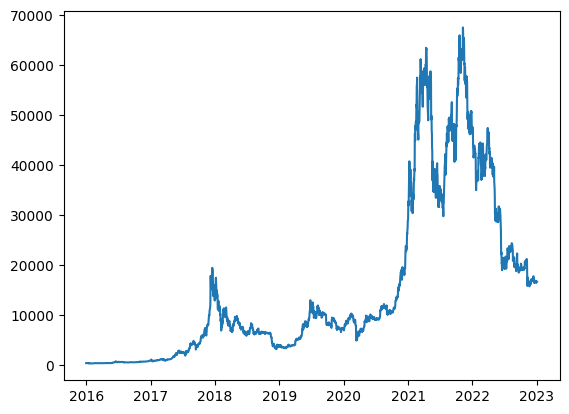

In [9]:
plt.plot(df.index, df[market_ticker])

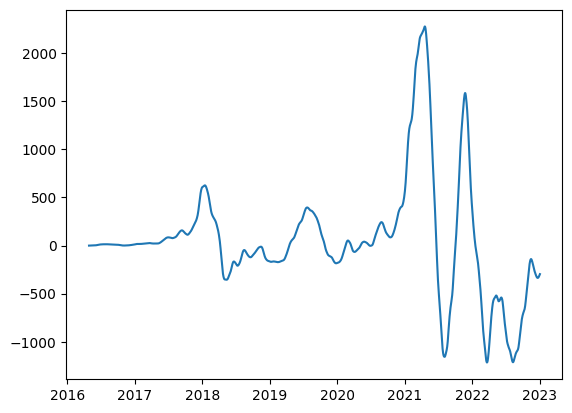

In [10]:
plt.plot(df.index, df['signal_macd120'])

In [11]:
# fig, axs = plt.subplots(3)
# fig.suptitle('Market and side')
# axs[0].plot(df.index, df[market_ticker])
# axs[1].plot(df.index, df['Volume_ma'])
# axs[2].bar(df.index, df['Volume_ma'])

In [12]:
# fig, axs = plt.subplots(4)
# fig.suptitle('Market and side')
# axs[0].plot(df.index, df[market_ticker])
# # axs[0].plot(df.index, df['macd'])
# axs[1].plot(df.index, df['signal_macd'])
# # axs[2].bar(df.index, df['masi'])
# axs[2].plot(df.index, df['signal_macd120'])
# # axs[2].plot(df.index, df['masi'])
# axs[3].plot(df.index, df['masi7'])